# Optimizing functions using SciPy

It is possible to use existing Python libraries in SciPy in order to find numerically minimizers of functions. The main algorithms are implemented. For a complete list check the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">online documentation</a>. 

Below is a simple example that you can take as a starting point for the practical session. Keep in mind that each of the methods available in scipy.optimize.minimize may require different corresponding inputs. In any case, you hould provide:

- the algorithm to be used in the optimization, using the parameter `method=`

- an objective function of your choice

- if a Gradient based algorithm is used the function computing the gradient may be given to the argument `jac=...`

- if the Hessian matrix is needed, give it as an argument with `hess=...`

- by default, the algorithm does not show you the optimization history. A callback function should be used if you want to recover information about the optimization history. An example of callback function is given below and it is provided to the minimization algorithm via the argument `calback=...`

- you may also provide a tolerance for termination using `tol=...`. This parameter should be tune by looking at the documentation regarding each method.

   1   -1.029715    1.241966    7.419510
   2   -1.057392    1.227979    5.440693
   3   -1.098699    1.206567    4.404571
   4   -1.094831    1.206799    4.394950
   5   -1.088631    1.199017    4.381698
   6   -1.069917    1.167096    4.334611
   7   -0.671555    0.423311    2.870689
   8   -0.656555    0.396630    2.862748
   9   -0.542234    0.257183    2.514161
  10   -0.402924    0.132259    2.058734
  11   -0.292088    0.084680    1.669532
  12   -0.199339    0.013767    1.505852
  13   -0.077081   -0.039051    1.362541
  14   -0.028445   -0.016065    1.086174
  15    0.136811   -0.020803    0.901281
  16    0.167562    0.021618    0.697125
  17    0.335166    0.077922    0.560435
  18    0.326465    0.100029    0.457940
  19    0.429924    0.174557    0.335551
  20    0.508023    0.238345    0.281020
  21    0.581622    0.323552    0.196744
  22    0.637653    0.408261    0.131571
  23    0.697956    0.479843    0.096559
  24    0.738412    0.533901    0.081314
  25    0.792856

<IPython.core.display.Javascript object>


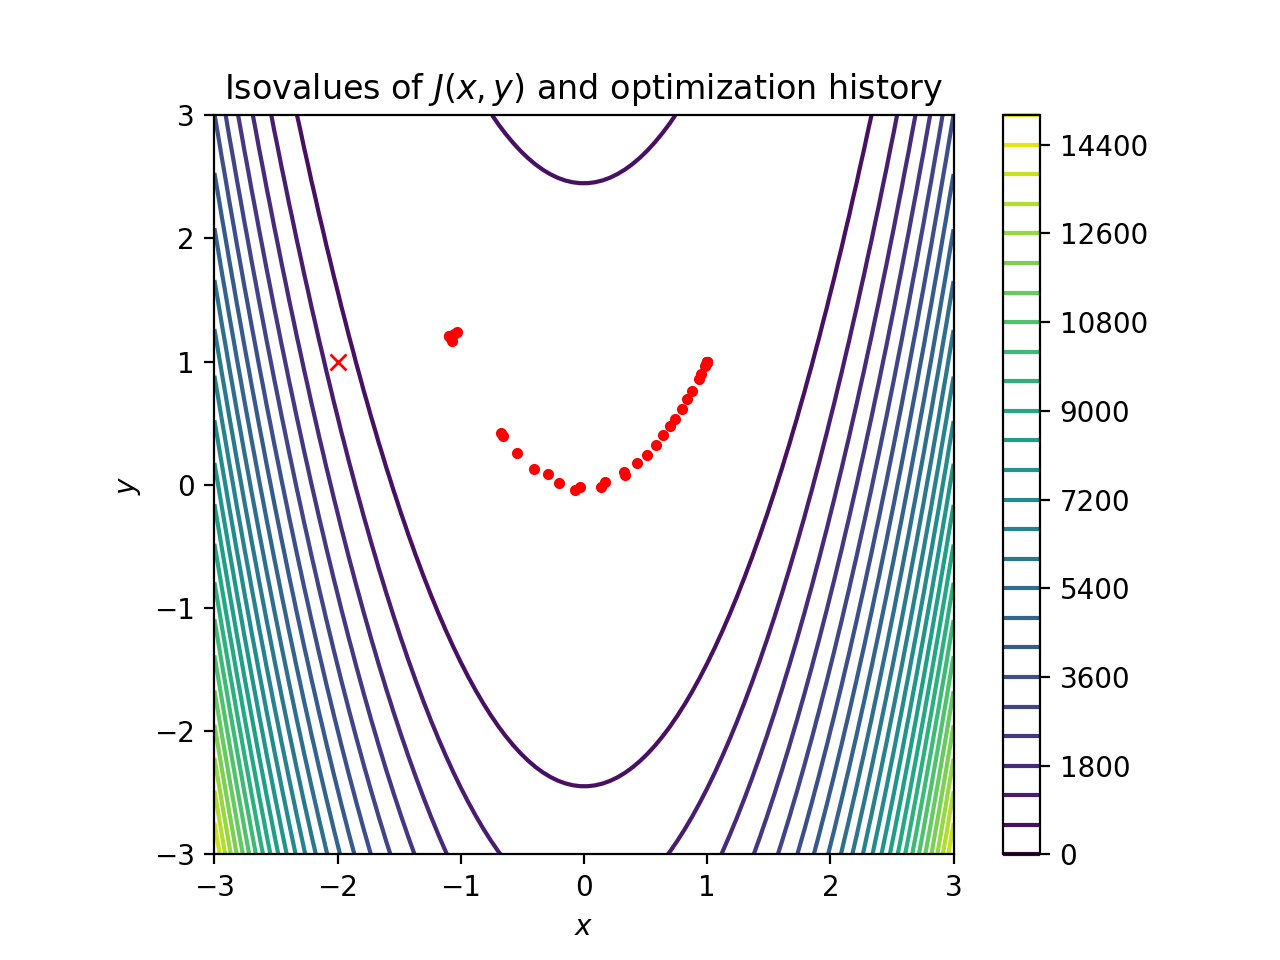

Details regarding the result of the optimization:
      fun: 1.232595164407831e-30
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.44089210e-14, -2.22044605e-14])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 49
      nit: 37
     njev: 49
   status: 0
  success: True
        x: array([1., 1.])


In [3]:
import scipy.optimize as scopt
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

variant = 1

def J(x):
    if variant==1:
        return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
    if variant==2:
        return (x[1]**4+x[0]**4)
    if variant==3:
        return (x[1]**2+x[0]**2)**2
def GradJ(x):
    if variant==1:
        return np.array([200*(x[1]-x[0]**2)*(-2*x[0])-2*(1-x[0]),200*(x[1]-x[0]**2)])
    if variant==2:
        return np.array([4*x[0]**3,4*x[1]**3])
    if variant==3:
        return np.array([(x[1]**2+x[0]**2)*2*2*x[0],(x[1]**2+x[0]**2)*2*2*x[1]])

Nfeval = 1
xs = []
ys = []
        
def callbackF(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, Xi[0], Xi[1], J(Xi)))
    xs.append(Xi[0])
    ys.append(Xi[1])
    Nfeval += 1

x0 = np.array([-2,1])    

#list of possible methods
#string = 'CG'
#string = 'BFGS'
#string = 'Nelder-Mead'  # gradient-free
#string = 'Powell'       # gradient-free
string = 'L-BFGS-B'
    
Result = scopt.minimize(J,x0,jac=GradJ,callback=callbackF,method=string,tol=1e-15)    

# plot the optimization history

plt.figure()
xmin=min(-2,x0[0])-1
xmax=max(2,x0[0])+1
ymin=min(-2,x0[1])-1
ymax=max(2,x0[1])+1
aX0=np.linspace(xmin,xmax,100)
aX1=np.linspace(ymin,ymax,100)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,25)#(np.linspace(0,30,10)**2))
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Isovalues of $J(x,y)$ and optimization history')

plt.plot(xs,ys,'.r')
plt.show()

print("Details regarding the result of the optimization:")
print(Result)
